In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from PIL import Image

####  Downloading images for operate

In [3]:
# test_u = "https://github.com/ZIqinGX/Herb_leaf_for_image_study/tree/main/flower60"
# urllib.request.urlretrieve(test_u, os.path.join('flo', "jiba"))

In [4]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('flo')

    # Now perform the following 60 times:
    for img_i in range(1, 61):

        # create a string using the current loop counter
        # 3 means how many digits will the printed number have; d means decimal integer
        f = '00_%03d.png' % img_i

        # and get the url with that string appended the end
        url = 'https://raw.githubusercontent.com/ZIqinGX/Herb_leaf_for_image_study/main/flower60/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('flo', f))
except:
    #os.rm('img_align_celeba')
    print("Download unsuccessful")

In [5]:
files = os.listdir('flo')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('flo', files[0]))
print(os.path.join('flo', files[1]))
plt.imread(os.path.join('flo', files[0]))

files = [os.path.join('flo', file_i)
 for file_i in os.listdir('flo')
 if '.png' in file_i]

# There should be 60 files, with the last one being number 59

img = plt.imread(files[31])

print(img,end ='\r')

flo\00_001.png
flo\00_002.png
[[[0.5921569  0.3529412  0.6509804  1.        ]
  [0.59607846 0.31764707 0.6392157  1.        ]
  [0.59607846 0.28627452 0.6392157  1.        ]
  ...
  [0.14901961 0.2        0.14117648 1.        ]
  [0.14901961 0.19607843 0.13725491 1.        ]
  [0.13725491 0.18431373 0.13333334 1.        ]]

 [[0.5882353  0.32941177 0.64705884 1.        ]
  [0.58431375 0.28627452 0.61960787 1.        ]
  [0.5764706  0.2509804  0.59607846 1.        ]
  ...
  [0.14117648 0.19215687 0.14901961 1.        ]
  [0.14117648 0.18431373 0.14117648 1.        ]
  [0.12941177 0.18039216 0.1254902  1.        ]]

 [[0.5764706  0.31764707 0.6431373  1.        ]
  [0.5764706  0.26666668 0.6        1.        ]
  [0.5647059  0.21960784 0.5529412  1.        ]
  ...
  [0.12941177 0.17254902 0.13725491 1.        ]
  [0.13725491 0.17254902 0.13333334 1.        ]
  [0.12941177 0.16862746 0.1254902  1.        ]]

 ...

 [[0.1764706  0.24313726 0.12156863 1.        ]
  [0.16078432 0.22352941 0.0

In [6]:
print(os.path.join('flo', files[31]))

flo\flo\00_032.png


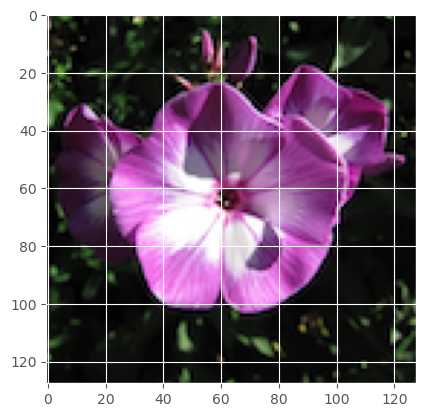

In [7]:
img = plt.imread(files[32])

plt.imshow(img)# use imshow function to see variable "img" which is the 120th img in leaf dirctory


##  Image Shapes



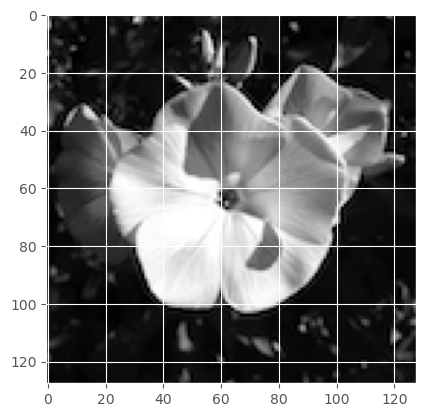

In [8]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel
# The colon : is used to select all the rows and columns in the image, and the 0 selects the first channel.

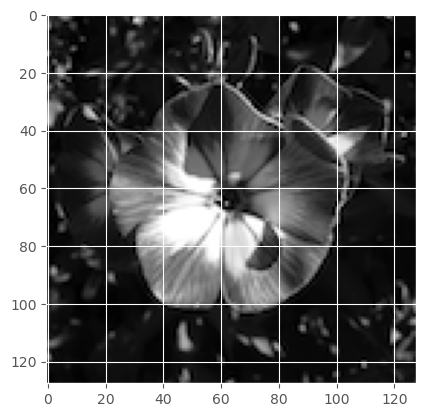

In [9]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

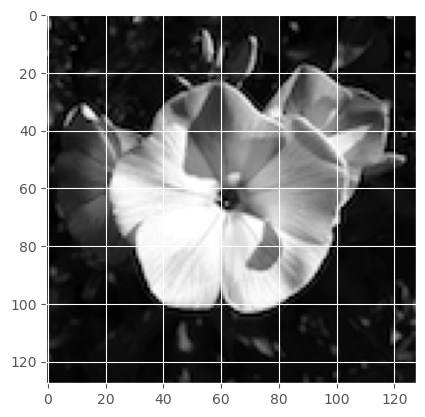

In [10]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

We use the special colon operator to say take every value in this dimension.  This is saying, give me every row, every column, and the 0th dimension of the color channels.  What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

Let's use another helper function which will load every image file in the celeb dataset rather than just give us the filenames like before.  By default, this will just return the first 100 images because loading the entire dataset is a bit cumbersome.  In one of the later sessions, I'll show you how tensorflow can handle loading images using a pipeline so we can load this same dataset.  For now, let's stick with this:

In [11]:
imgs = [plt.imread(files[file_i])
        for file_i in range(60)]

#imgs = utils.get_celeb_imgs() # nope nope nope

We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

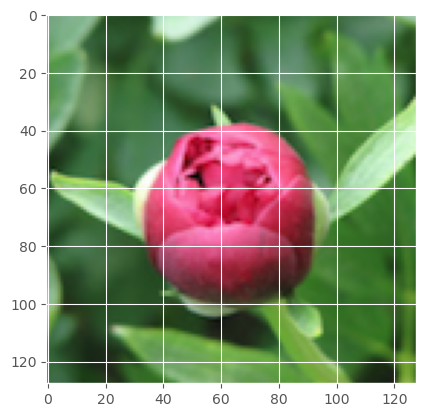

In [12]:
plt.imshow(imgs[59])

<a name="the-batch-dimension"></a>
## The Batch Dimension

Remember that an image has a shape describing the height, width, channels:

In [13]:
imgs[0].shape

(128, 128, 4)

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [14]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 60 images, with a height of 128, width of 128, and 4 colour channels")


(60, 128, 128, 4)
The shape of our new 'data' object is a 'batch' of 60 images, with a height of 128, width of 128, and 4 colour channels


Average Flower


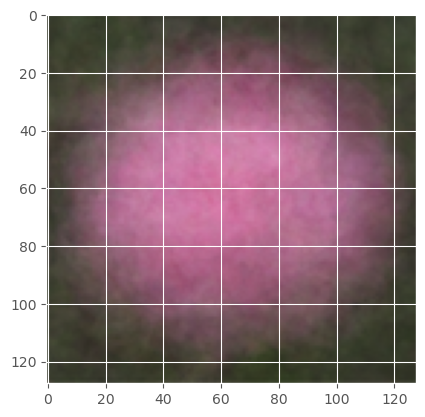

In [15]:
mean_img = np.mean(imgs, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img)
print("Average Flower")

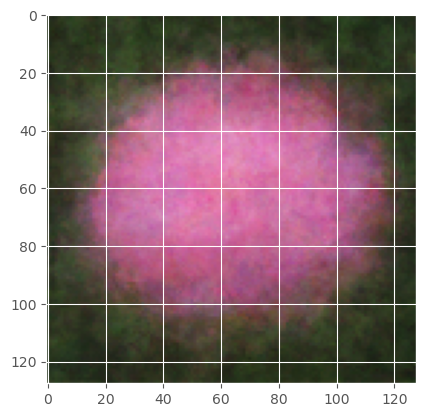

In [16]:
med_img = np.median(imgs, axis=0) # This is the mean of the 'batch' channel
plt.imshow(med_img)


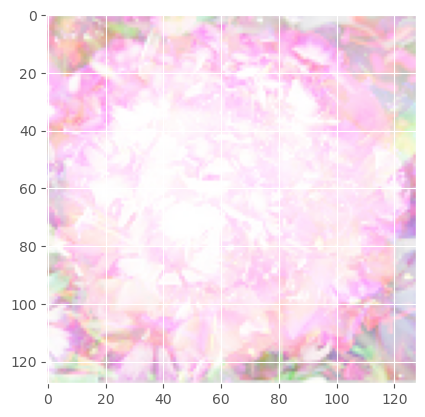

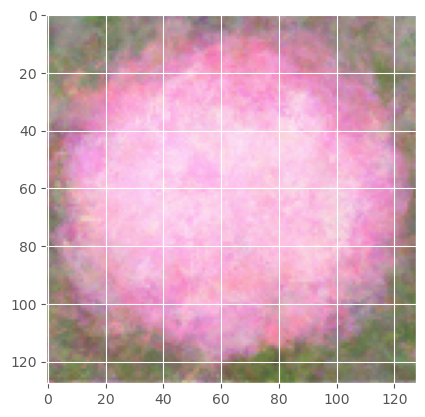

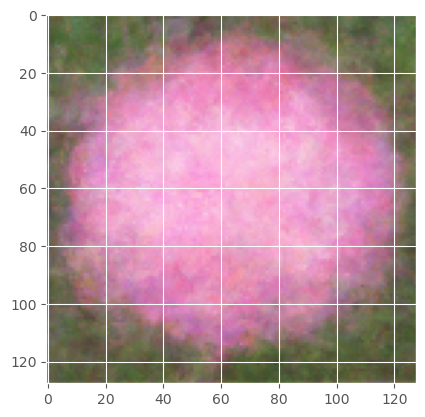

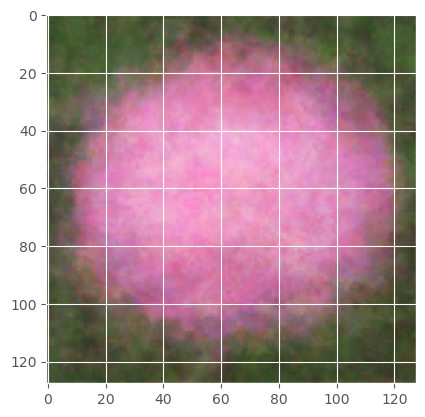

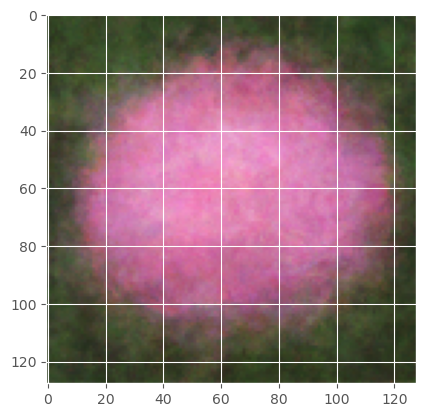

In [17]:
for i in range(5):
#     print(i)
    qua_img = np.quantile(data, 1 - (i/10), axis=0) # This is the mean of the 'batch' channel
    plt.imshow(qua_img)
    plt.show()

### Let's try different operations on less pictures to see the effect

In [18]:
imgs2 = [plt.imread(files[file_i])
        for file_i in range(5)]

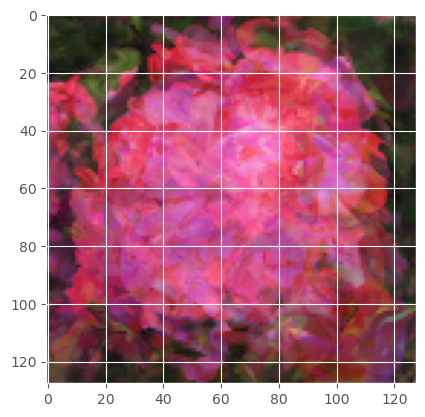

In [19]:
nan_img2 = np.nanmedian(imgs2, axis=0) 
plt.imshow(nan_img2)

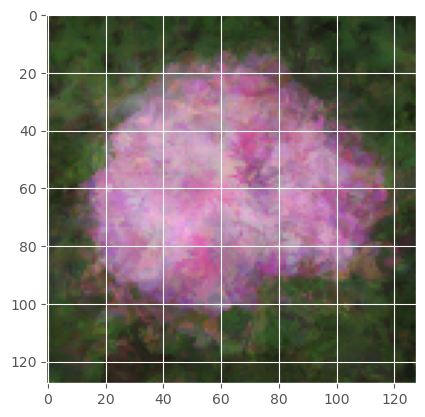

In [20]:
imgs3 = [plt.imread(files[file_i])
        for file_i in range(5,20)]
nan_img3 = np.nanmedian(imgs3, axis=0) 
plt.imshow(nan_img3)

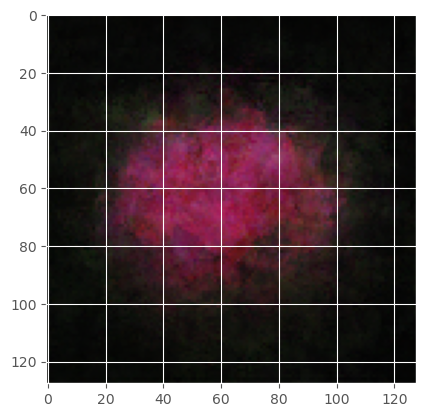

In [21]:
imgs3 = [plt.imread(files[file_i])
        for file_i in range(60)]

per_img3 = np.percentile(imgs3,10, axis=0) 

plt.imshow(per_img3)






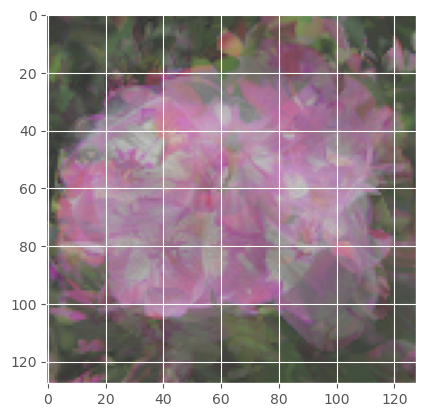

In [22]:
imgs4 = [plt.imread(files[file_i])
        for file_i in range(25,30)]

nan_img4 = np.nanmedian(imgs4, axis=0)*0.8 

plt.imshow(nan_img4)



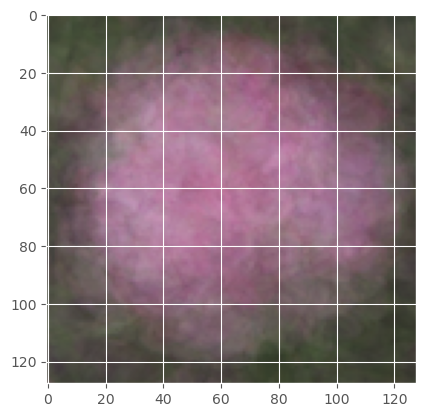

In [23]:
imgs5 = [plt.imread(files[file_i])
        for file_i in range(6,28)]
ave_img5 = 0.9*np.average(imgs5, axis=0)+0.01
plt.imshow(ave_img5)

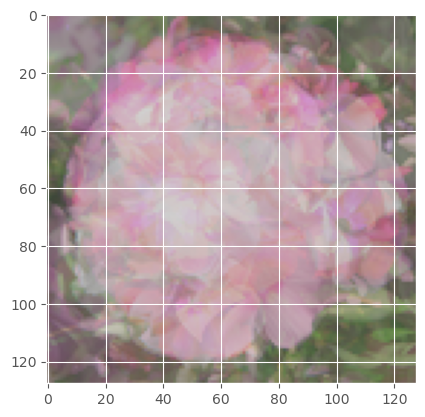

In [24]:
imgs6 = [plt.imread(files[file_i])
        for file_i in range(6,14)]
quant_img6 = 0.8*np.quantile(imgs6,0.9, axis=0)+ 0.01*np.average(imgs6, axis=0)
plt.imshow(quant_img6)


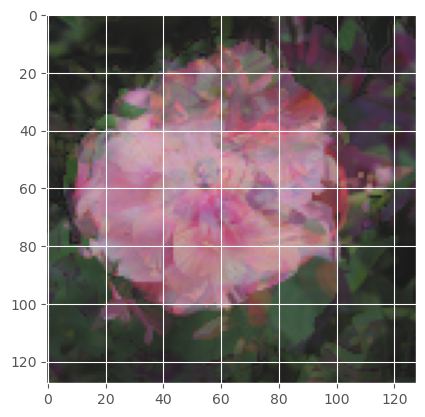

In [25]:
imgs7 = [plt.imread(files[file_i])
        for file_i in([6]+[8]+[10] +[14]+ [j for j in range(29, 30)]+[37])]
quant_img7 = np.quantile(imgs7,0.4, axis=0)*0.9
plt.imshow(quant_img7)

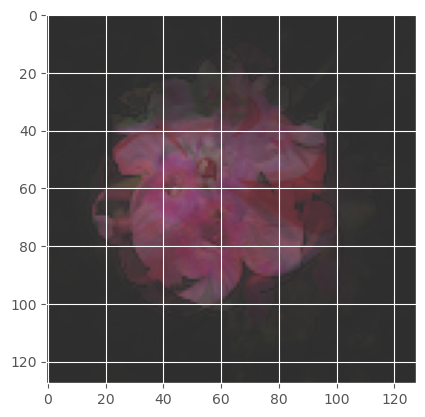

In [26]:
imgs8 = [plt.imread(files[file_i])
        for file_i in range(28,42)]
average_img8 = 0.8*np.average(imgs8, axis=0)*np.quantile(imgs7,0.02, axis=0)
plt.imshow(average_img8)

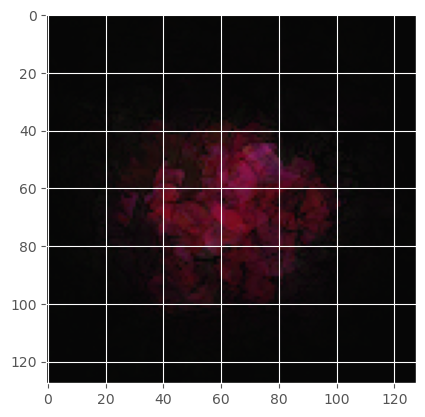

In [27]:
imgs9 = [plt.imread(files[file_i])
        for file_i in range(22,50)]
average_img9 = 0.98* np.average(imgs9, axis=0)* np.quantile(imgs9,0.026, axis=0)
plt.imshow(average_img9)

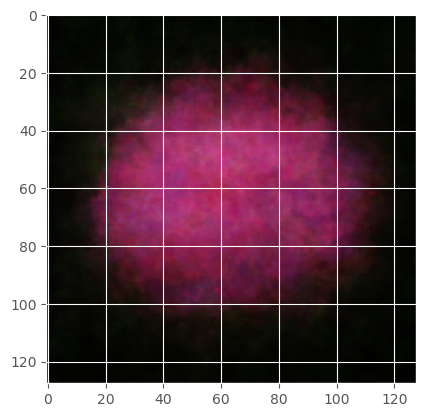

In [28]:
imgs10 = [plt.imread(files[file_i])
        for file_i in range(1,50)]
per_img10 = np.percentile(imgs10,37, axis=0)* np.median(imgs3,axis=0)
plt.imshow(per_img10)